# ECG Heartbeat Categorization Dataset
Kaggle dataset: https://www.kaggle.com/shayanfazeli/heartbeat

Work by:
Lee Lin Jie (LJ Lee)
- PhD in Life Sciences
- Aspiring Data Scientist
Email: ljleeworking@gmail.com

# Introduction

#### Arrhythmia is a problem with the rate or rhythm of your heartbeat(too fast / too slow / irregular pattern)

<img src="arrhythmia.jpg" width="440" height="440" >



#### Factors that affect heart's rhythm: heart attack, smoking, congenital heart defects, and stress. Some substances or medicines may also cause arrhythmias. 

#### Identification of the types of arrhythmia will facilaite treatment to restore a normal heart rhythm.

#### Arrhythmia Dataset: composed of  heartbeat signals derived from the MIT-BIH Arrhythmia Dataset to classify heartbeat.


- Number of Samples: 109446
- Number of Categories: 5
- Sampling Frequency: 125Hz
- Data Source: Physionet's MIT-BIH Arrhythmia Dataset
- Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

# Part 1-Data cleaning and EDA

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# load the csv files

test_df = pd.read_csv('./mitbih_test.csv',header=None)
train_df = pd.read_csv('./mitbih_train.csv',header=None)

In [4]:
# Check the train dataset
print(train_df.shape)
# 87554 rows, 188 column
print(train_df.info())
# No null
print(train_df.head())

(87554, 188)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB
None
        0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.

In [5]:
# check for the unique values of each column in train data
for item in train_df:
    print(item, train_df[item].nunique())
print(train_df.shape)
# Variation has mostly different values

0 23408
1 42845
2 49611
3 41007
4 39328
5 40559
6 40516
7 40423
8 40305
9 39950
10 40106
11 40347
12 40320
13 40628
14 41177
15 41671
16 42091
17 42404
18 42914
19 43188
20 43678
21 44172
22 44576
23 44779
24 45154
25 45500
26 45612
27 46051
28 46434
29 46729
30 46719
31 46839
32 46364
33 46230
34 46283
35 46241
36 46005
37 45864
38 45604
39 45630
40 45347
41 44982
42 44738
43 44358
44 44234
45 43859
46 43714
47 43539
48 43191
49 43062
50 43036
51 42994
52 42901
53 43068
54 43079
55 43168
56 43194
57 43126
58 43094
59 43344
60 43493
61 43551
62 43608
63 43540
64 43689
65 43826
66 43789
67 43571
68 43632
69 43398
70 43182
71 42983
72 42859
73 42587
74 42472
75 42266
76 42506
77 42441
78 42505
79 42155
80 41864
81 41514
82 41141
83 41031
84 40877
85 40759
86 40387
87 40090
88 39757
89 38969
90 38494
91 37927
92 37172
93 36701
94 36032
95 35862
96 35574
97 35019
98 34649
99 34352
100 33787
101 33370
102 32584
103 31973
104 31198
105 30619
106 29791
107 29163
108 28263
109 27653
110 26803


0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


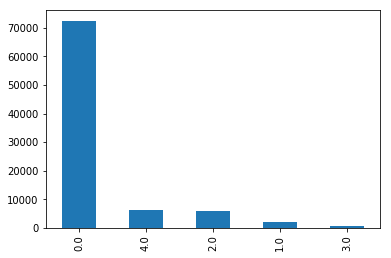

In [67]:
import matplotlib.pyplot as plt
import pandas as pd

CountStatus = pd.value_counts(train_df[187], sort=True)
print(CountStatus)

CountStatus.plot.bar()

In [2]:
# Check the test dataset
print(test_df.shape)
#21892 rows, 188 columns
print(test_df.info())
# no null values
print(test_df.head())

(21892, 188)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB
None
        0         1         2         3         4         5         6    \
0  1.000000  0.758264  0.111570  0.000000  0.080579  0.078512  0.066116   
1  0.908425  0.783883  0.531136  0.362637  0.366300  0.344322  0.333333   
2  0.730088  0.212389  0.000000  0.119469  0.101770  0.101770  0.110619   
3  1.000000  0.910417  0.681250  0.472917  0.229167  0.068750  0.000000   
4  0.570470  0.399329  0.238255  0.147651  0.000000  0.003356  0.040268   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.049587  0.047521  0.035124  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.307692  0.296703  0.300366  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.123894  0.115044  0.132743  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.004167  0.014583  0.054167  ...  0.0  0.0  0.0  0.0  0.0

In [3]:
# check for the unique values of each column in test data
for item in test_df:
    print(item, test_df[item].nunique())
print(test_df.shape)
# last column is target column - 5 class

0 8507
1 16139
2 17462
3 15054
4 15217
5 15453
6 15565
7 15672
8 15641
9 15562
10 15615
11 15713
12 15740
13 15729
14 15872
15 16053
16 16004
17 16205
18 16240
19 16416
20 16452
21 16474
22 16626
23 16708
24 16706
25 16807
26 16836
27 16918
28 17146
29 17148
30 17116
31 17051
32 17042
33 16954
34 16988
35 16935
36 16900
37 16922
38 16841
39 16821
40 16794
41 16665
42 16616
43 16592
44 16550
45 16460
46 16390
47 16314
48 16306
49 16227
50 16288
51 16241
52 16316
53 16241
54 16286
55 16226
56 16244
57 16277
58 16151
59 16192
60 16315
61 16358
62 16299
63 16222
64 16322
65 16265
66 16178
67 16159
68 16134
69 16007
70 15975
71 15992
72 15800
73 15813
74 15722
75 15622
76 15577
77 15435
78 15320
79 15153
80 14914
81 14849
82 14669
83 14526
84 14373
85 14385
86 14235
87 14100
88 13890
89 13688
90 13508
91 13311
92 13111
93 12931
94 12624
95 12471
96 12303
97 12052
98 11785
99 11549
100 11390
101 11170
102 10902
103 10530
104 10322
105 9942
106 9664
107 9415
108 9136
109 8892
110 8666
111 847

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64


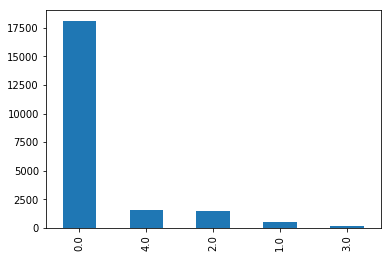

In [68]:
import matplotlib.pyplot as plt
import pandas as pd

CountStatus = pd.value_counts(test_df[187], sort=True)
print(CountStatus)

CountStatus.plot.bar()

Summary of the EDA:

- column 0 to 186 are the signals
- There are 5 classes 
- Imbalance class with class 1 and 3 as the minority

# Part 2-The approach for the problem


### A) Model: Random forest Classifier

In [16]:
# RFC, no SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, log_loss

rfc1 = RandomForestClassifier()
rfc1.fit(X_train, y_train)

y_pred = rfc1.predict(X_val)

yhat_pp = rfc1.predict_proba(X_val)
print('log loss:', log_loss(y_val, yhat_pp))

print(classification_report(y_val, y_pred,))

log loss: 0.29785822880140017
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     14494
         1.0       0.96      0.60      0.73       445
         2.0       0.97      0.85      0.91      1158
         3.0       0.96      0.51      0.66       128
         4.0       0.99      0.94      0.97      1286

   micro avg       0.97      0.97      0.97     17511
   macro avg       0.97      0.78      0.85     17511
weighted avg       0.97      0.97      0.97     17511



In [20]:
y_test_df = test_df[187]
X_test_df = test_df.drop([187], axis = 1)

y_predict = rfc1.predict(X_test_df)
yhat_pp = rfc1.predict_proba(X_test_df)

print('log loss:', log_loss(y_test_df, yhat_pp))
print(classification_report(y_test_df, y_predict))

log loss: 0.3165935765317
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18118
         1.0       0.97      0.58      0.73       556
         2.0       0.97      0.85      0.91      1448
         3.0       0.87      0.56      0.68       162
         4.0       0.99      0.93      0.96      1608

   micro avg       0.97      0.97      0.97     21892
   macro avg       0.95      0.79      0.85     21892
weighted avg       0.97      0.97      0.97     21892



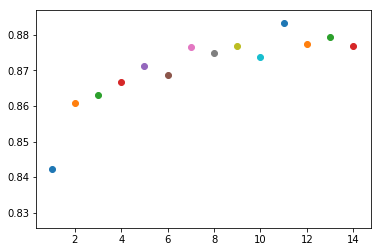

In [44]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from imblearn.pipeline import Pipeline

rfc = RandomForestClassifier(random_state=620)

for k in range(1,15):
    sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=240)
    X_smote, y_smote = sm.fit_sample(X_train, y_train)
    rfc.fit(X_smote,y_smote)
    smote_predict = rfc.predict(X_val)
    recall = recall_score(y_val, smote_predict,average='macro')
#     print ('Accuracy for Minority Class for k=',k, ':', recall)
    plt.scatter(k, recall)

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

CountStatus = pd.value_counts(y_smote, sort=True)
print(CountStatus)
# all class is balanced to same ratio

1.0    57977
3.0    57977
4.0    57977
2.0    57977
0.0    57977
dtype: int64


In [45]:
sm = SMOTE(sampling_strategy='auto',k_neighbors=11, random_state=240)
X_smote, y_smote = sm.fit_sample(X_train, y_train)
print(X_smote.shape)

(289885, 187)


In [27]:
# RFC, SMOTE

rfc2 = RandomForestClassifier(random_state=620)
rfc2.fit(X_smote, y_smote)

y_predict2 = rfc2.predict(X_val)

yhat_pp = rfc2.predict_proba(X_val)
print('log loss:', log_loss(y_val, yhat_pp))

print(classification_report(y_val, y_predict2,))
# SMOTE improve RFC results slightly

log loss: 0.20346616003559354
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     14494
         1.0       0.77      0.77      0.77       445
         2.0       0.93      0.93      0.93      1158
         3.0       0.74      0.67      0.70       128
         4.0       0.98      0.97      0.98      1286

   micro avg       0.97      0.97      0.97     17511
   macro avg       0.88      0.87      0.87     17511
weighted avg       0.97      0.97      0.97     17511



In [107]:
# predict test data
y_predict2 = rfc2.predict(X_test_df)
yhat_pp = rfc2.predict_proba(X_test_df)

print('log loss:', log_loss(y_test_df, yhat_pp))
print(classification_report(y_test_df, y_predict))
# SMOTE improve RFC results slightly

log loss: 0.2199296065300651
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     18118
         1.0       0.78      0.76      0.77       556
         2.0       0.93      0.92      0.93      1448
         3.0       0.73      0.72      0.72       162
         4.0       0.99      0.96      0.98      1608

   micro avg       0.97      0.97      0.97     21892
   macro avg       0.88      0.87      0.88     21892
weighted avg       0.97      0.97      0.97     21892



### B) Model:  XGBoost

In [22]:
# XGBoost
import xgboost as xgb

model=xgb.XGBClassifier(random_state=1,learning_rate=0.1)
model.fit(X_train,y_train)
model.score(X_val,val)

y_pred = model.predict(X_val)

yhat_pp = model.predict_proba(X_val)
print('log loss:', log_loss(y_val, yhat_pp))
print(classification_report( y_val,y_pred))
# Slightly worse f1-score, but better log loss score than RFC

log loss: 0.15430224313349417
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     14494
         1.0       0.90      0.52      0.66       445
         2.0       0.96      0.77      0.86      1158
         3.0       0.90      0.37      0.52       128
         4.0       0.98      0.92      0.95      1286

   micro avg       0.96      0.96      0.96     17511
   macro avg       0.94      0.72      0.79     17511
weighted avg       0.96      0.96      0.96     17511



In [23]:
y_pred = model.predict(X_test_df)

yhat_pp = model.predict_proba(X_test_df)
print('log loss:', log_loss(y_test_df, yhat_pp))
print(classification_report( y_test_df,y_pred))
# Slightly worse f1-score, but better log loss score than RFC

log loss: 0.1534576523508041
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     18118
         1.0       0.93      0.53      0.68       556
         2.0       0.95      0.78      0.86      1448
         3.0       0.73      0.34      0.46       162
         4.0       0.98      0.91      0.94      1608

   micro avg       0.96      0.96      0.96     21892
   macro avg       0.91      0.71      0.78     21892
weighted avg       0.96      0.96      0.96     21892



### C) Model: Neural Networks / Keras
Adapted from research paper ArXiv 1805.00794

In [109]:
M = train_df.values
X = M[:, :-1]
y = M[:, -1]

C0 = np.argwhere(y == 0).flatten()
C1 = np.argwhere(y == 1).flatten()
C2 = np.argwhere(y == 2).flatten()
C3 = np.argwhere(y == 3).flatten()
C4 = np.argwhere(y == 4).flatten()

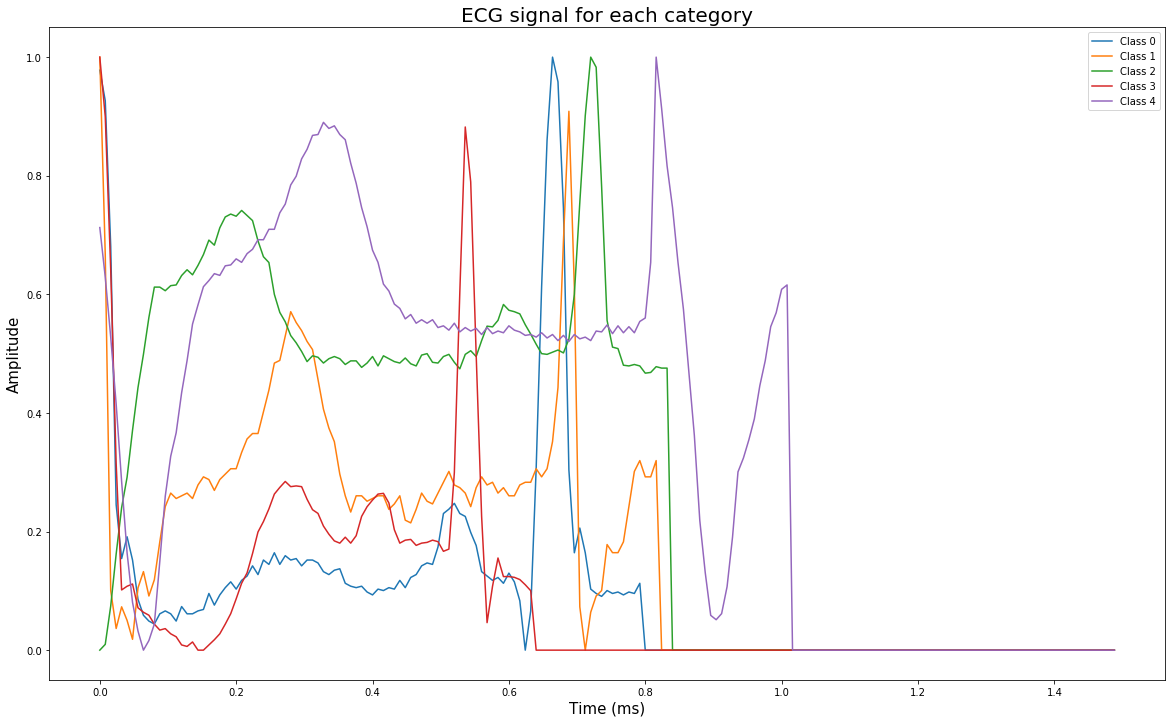

In [111]:
# example of ECG signal for each class
x = np.arange(0, 187)*8/1000

plt.figure(figsize=(20,12))
plt.plot(x, X[C0, :][0], label="Class 0")
plt.plot(x, X[C1, :][0], label="Class 1")
plt.plot(x, X[C2, :][0], label="Class 2")
plt.plot(x, X[C3, :][0], label="Class 3")
plt.plot(x, X[C4, :][0], label="Class 4")
plt.legend()
plt.title("ECG signal for each category", fontsize=20)
plt.ylabel("Amplitude", fontsize=15)
plt.xlabel("Time (ms)", fontsize=15)
plt.show()

In [72]:
# feature engineering
def stretch(x):
    l = int(187 * (1 + (random.random()-0.5)/3))
    y = resample(x, l)
    if l < 187:
        y_ = np.zeros(shape=(187, ))
        y_[:l] = y
    else:
        y_ = y[:187]
    return y_

def amplify(x):
    alpha = (random.random()-0.5)
    factor = -alpha*x + (1+alpha)
    return x*factor

def augment(x):
    result = np.zeros(shape= (4, 187))
    for i in range(3):
        if random.random() < 0.33:
            new_y = stretch(x)
        elif random.random() < 0.66:
            new_y = amplify(x)
        else:
            new_y = stretch(x)
            new_y = amplify(new_y)
        result[i, :] = new_y
    return result

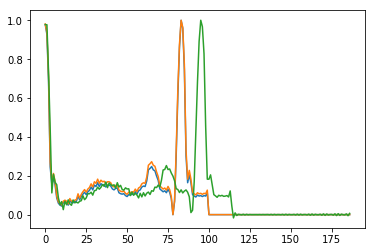

In [73]:
# plot of the Class 0 signal after being modified
import random
from scipy.signal import resample
plt.plot(X[0, :])
plt.plot(amplify(X[0, :]))
plt.plot(stretch(X[0, :]))
plt.show()

In [74]:
# Set the train and validation dataset
result = np.apply_along_axis(augment, axis=1, arr=X[C3]).reshape(-1, 187)
classe = np.ones(shape=(result.shape[0],), dtype=int)*3
X = np.vstack([X, result])
y = np.hstack([y, classe])

subC0 = np.random.choice(C0, 400)
subC1 = np.random.choice(C1, 400)
subC2 = np.random.choice(C2, 400)
subC3 = np.random.choice(C3, 400)
subC4 = np.random.choice(C4, 400)

from sklearn.utils import shuffle

X_val = np.vstack([X[subC0], X[subC1], X[subC2], X[subC3], X[subC4]])
y_val = np.hstack([y[subC0], y[subC1], y[subC2], y[subC3], y[subC4]])

X_train = np.delete(X, [subC0, subC1, subC2, subC3, subC4], axis=0)
y_train = np.delete(y, [subC0, subC1, subC2, subC3, subC4], axis=0)

X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_val, y_val = shuffle(X_val, y_val, random_state=0)


In [77]:
# transform data for modelling
X_train = np.expand_dims(X_train, 2)
X_val = np.expand_dims(X_val, 2)
ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train.reshape(-1,1))
y_val = ohe.transform(y_val.reshape(-1,1))
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_val", X_val.shape)
print("y_val", y_val.shape)

X_train (88278, 187, 1)
y_train (88278, 5)
X_val (2000, 187, 1)
y_val (2000, 5)


In [78]:
# Modelling setting
n_obs, feature, depth = X_train.shape
batch_size = 500

In [79]:
K.clear_session()

inp = Input(shape=(feature, depth))
C = Conv1D(filters=32, kernel_size=5, strides=1)(inp)

C11 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(C)
A11 = Activation("relu")(C11)
C12 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A11)
S11 = Add()([C12, C])
A12 = Activation("relu")(S11)
M11 = MaxPooling1D(pool_size=5, strides=2)(A12)


C21 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M11)
A21 = Activation("relu")(C21)
C22 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A21)
S21 = Add()([C22, M11])
A22 = Activation("relu")(S11)
M21 = MaxPooling1D(pool_size=5, strides=2)(A22)


C31 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M21)
A31 = Activation("relu")(C31)
C32 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A31)
S31 = Add()([C32, M21])
A32 = Activation("relu")(S31)
M31 = MaxPooling1D(pool_size=5, strides=2)(A32)


C41 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M31)
A41 = Activation("relu")(C41)
C42 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A41)
S41 = Add()([C42, M31])
A42 = Activation("relu")(S41)
M41 = MaxPooling1D(pool_size=5, strides=2)(A42)


C51 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(M41)
A51 = Activation("relu")(C51)
C52 = Conv1D(filters=32, kernel_size=5, strides=1, padding='same')(A51)
S51 = Add()([C52, M41])
A52 = Activation("relu")(S51)
M51 = MaxPooling1D(pool_size=5, strides=2)(A52)

F1 = Flatten()(M51)

D1 = Dense(32)(F1)
A6 = Activation("relu")(D1)
D2 = Dense(32)(A6)
D3 = Dense(5)(D2)
A7 = Softmax()(D3)

model = Model(inputs=inp, outputs=A7)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 187, 1)       0                                            
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 183, 32)      192         input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 183, 32)      5152        conv1d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 183, 32)      0           conv1d_2[0][0]                   
__________________________________________________________________________________________________
conv1d_3 (

In [83]:
# run the model
import math

def exp_decay(epoch):
    initial_lrate = 0.001
    k = 0.75
    t = n_obs//(10000 * batch_size)  # every epoch we do n_obs/batch_size iteration
    lrate = initial_lrate * math.exp(-k*t)
    return lrate

lrate = LearningRateScheduler(exp_decay)



adam = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999)



model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    epochs=75, 
                    batch_size=batch_size, 
                    verbose=2, 
                    validation_data=(X_val, y_val), 
                    callbacks=[lrate])

Train on 88278 samples, validate on 2000 samples
Epoch 1/75
 - 148s - loss: 0.4232 - acc: 0.8747 - val_loss: 0.8576 - val_acc: 0.7155
Epoch 2/75
 - 147s - loss: 0.1723 - acc: 0.9513 - val_loss: 0.5707 - val_acc: 0.8215
Epoch 3/75
 - 147s - loss: 0.1270 - acc: 0.9652 - val_loss: 0.5701 - val_acc: 0.8190
Epoch 4/75
 - 146s - loss: 0.1048 - acc: 0.9705 - val_loss: 0.4152 - val_acc: 0.8710
Epoch 5/75
 - 147s - loss: 0.0897 - acc: 0.9748 - val_loss: 0.3947 - val_acc: 0.8765
Epoch 6/75
 - 159s - loss: 0.0809 - acc: 0.9769 - val_loss: 0.4289 - val_acc: 0.8730
Epoch 7/75
 - 166s - loss: 0.0737 - acc: 0.9783 - val_loss: 0.3062 - val_acc: 0.8945
Epoch 8/75
 - 151s - loss: 0.0644 - acc: 0.9810 - val_loss: 0.4267 - val_acc: 0.8855
Epoch 9/75
 - 152s - loss: 0.0622 - acc: 0.9810 - val_loss: 0.3795 - val_acc: 0.8885
Epoch 10/75
 - 152s - loss: 0.0584 - acc: 0.9822 - val_loss: 0.2939 - val_acc: 0.9005
Epoch 11/75
 - 169s - loss: 0.0512 - acc: 0.9843 - val_loss: 0.2598 - val_acc: 0.9095
Epoch 12/75
 -

In [114]:
# check on validation set
y_pred = model.predict(X_val, batch_size=1000)
print("log loss : {:.3f}".format(log_loss(y_val.todense(), y_pred)))
print(classification_report(y_val.argmax(axis=1), y_pred.argmax(axis=1)))
# comparable result as RFC, prediction are better for the minority groups

log loss : 0.324
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       400
           1       1.00      0.83      0.91       400
           2       0.88      0.97      0.92       400
           3       0.99      0.83      0.90       400
           4       0.99      0.99      0.99       400

   micro avg       0.92      0.92      0.92      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.92      0.92      2000



In [94]:
# predict test set
M = test_df.values
X_test = M[:, :-1]
y_test = M[:, -1]

In [96]:
X_test = np.expand_dims(X_test, 2)
ohe = OneHotEncoder()
y_test = ohe.fit_transform(y_test.reshape(-1,1))

print("X_train", X_test.shape)
print("y_train", y_test.shape)

X_train (21892, 187, 1)
y_train (21892, 5)


In [116]:
y_pred2 = model.predict(X_test)
print("log loss: {:.3f}".format(log_loss(y_test.todense(), y_pred2)))
print(classification_report(y_test.argmax(axis=1), y_pred2.argmax(axis=1)))
# slightly better result than RFC for the test set

log loss: 0.081
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18118
           1       0.90      0.81      0.85       556
           2       0.96      0.97      0.96      1448
           3       0.84      0.78      0.81       162
           4       0.99      0.99      0.99      1608

   micro avg       0.99      0.99      0.99     21892
   macro avg       0.93      0.91      0.92     21892
weighted avg       0.99      0.99      0.99     21892



# Part 3 - Evaluation

In [119]:
confusion_mat = pd.DataFrame(np.array(confusion_matrix(y_test.argmax(axis=1), y_pred2.argmax(axis=1))),
                         index = ['0', '1','2', '3','4'],
                        columns=['pred_0', 'pred_1','pred_2', 'pred_3','pred_4'])
confusion_mat

,pred_0,pred_1,pred_2,pred_3,pred_4
0,18021,43,32,12,10
1,92,448,13,2,1
2,26,5,1401,11,5
3,14,0,20,127,1
4,13,2,1,0,1592


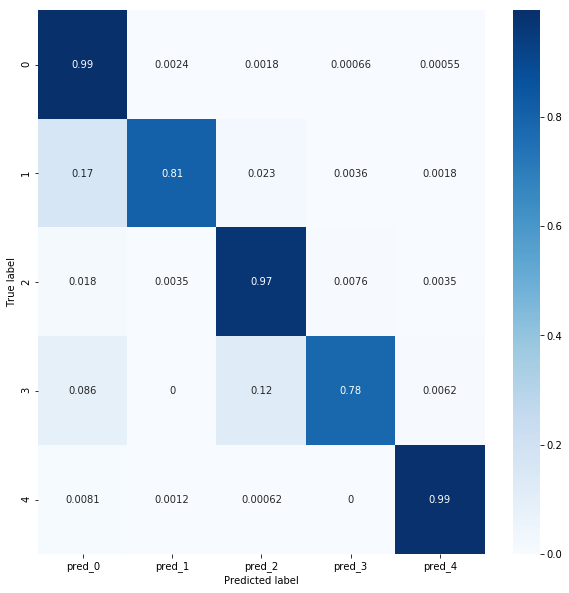

In [118]:
# confusion matrix of individual class fraction 
import seaborn as sns
conf_mat=pd.DataFrame(np.array(confusion_matrix(y_test.argmax(axis=1), y_pred2.argmax(axis=1))),
                         index = ['0', '1','2', '3','4'],
                        columns=['pred_0', 'pred_1','pred_2', 'pred_3','pred_4'])
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat.apply(lambda x: x/x.sum(),axis=1), annot=True, cmap = 'Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Insights
- Class 0, 2 , 4 are well predicted.
- Limitation: class 1 and 3 (minority) are about 80 % predicted correctly.
- about 17% of class 1 are predicted as 0. Try extract these 2 classes and further study them may give better prediction.
- about 12% of class 3 are predicted as 2. Try extract these 2 classes and further study them may give better prediction.